In [38]:
# 0925 조상혁 csv 파일을 그래프로 만드는 파일입니다.
import csv
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import math
import pandas as pd
import re
from collections import Counter
from itertools import islice

from matplotlib import font_manager, rc

# plt.show()시 한글 폰트 깨지는거 방지
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)


In [39]:
f = open(r'C:/Users/Playdata/pytest/MainProject/\sample.csv', encoding='utf-8')
data = csv.reader(f)
# f2 = open(r'C:/Users/Playdata/pytest/MainProject/\sample.csv', encoding='utf-8')
# data = csv.reader(f2)



In [40]:
# csv 파일에서부터 각각의 그래프를 만드는데 필요한 변수들을 모아 리턴합니다. 
def len_like_bag_ngram(comment_data) :
    len_list = []
    like_list = []
    word_bag = []
    Ngram =[]
    count = 0
    for i in comment_data:
        if count ==0:
            count =1
            continue
        temp = re.findall(r'\w+', i[2]) #특수문자를 제외한 글자들만 뽑아 리스트 형태로 저장함
        word_bag +=temp
        len_list.append(len(temp))
        like_list.append(int(i[3]))
        Ngram += [temp[i] +' '+temp[i+1] for i in range(len(temp)-1)]
                         
    return len_list, like_list , word_bag , Ngram

In [41]:
# 각 함수 인풋 데이터 형성
len_list , like_list , word_bag , Ngram = len_like_bag_ngram(data)

    

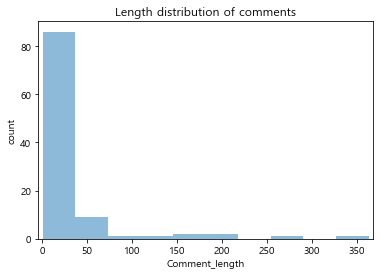

In [42]:
# 각 댓글별 단어수의 분포도
def len_distribution(len_list):
    plt.xlim([min(len_list)-5, max(len_list)+5])
    plt.hist(len_list, alpha=0.5, bins=10)
    plt.title("Length distribution of comments")
    plt.xlabel('Comment_length')
    plt.ylabel('count')
    plt.show()

len_distribution(len_list)

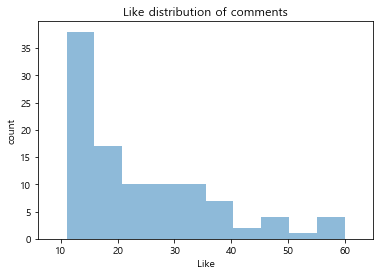

In [43]:
# 각 댓글별 좋아요수의 분포도
def like_distribution(like_list):
    plt.xlim([min(like_list)-5, max(like_list)+5])
    plt.hist(like_list, alpha=0.5)
    plt.title("Like distribution of comments")
    plt.xlabel('Like')
    plt.ylabel('count')
    plt.show()

like_distribution(like_list)

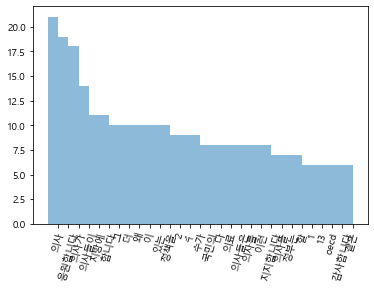

In [44]:
# 단어의 출현 빈도수
def word_frequency(bag):
    freq_word = Counter(bag)
    top_30 = list(islice(sorted(freq_word.items(),key=lambda x: (-x[1], x[0])), 30))
    labels, values = zip(*top_30)
    indexes = np.arange(len(labels))
    width = 1
    plt.bar(indexes, values, width, alpha=0.5)
    plt.xticks(indexes + width * 0.5, labels, rotation=75)
    plt.show()

word_frequency(word_bag)

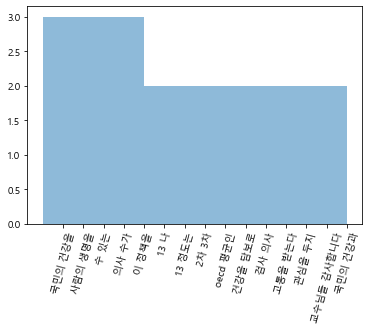

In [45]:
# 복합 명사의 출현 횟수를 보여주는 그래프
def ngram_frequency(bag):
    freq_word = Counter(bag)
    top_15 = list(islice(sorted(freq_word.items(),key=lambda x: (-x[1], x[0])), 15)) # 갯수가 상위 15개인것만 추림
    labels, values = zip(*top_15)
    indexes = np.arange(len(labels))
    width = 1
    plt.bar(indexes, values, width, alpha=0.5)
    plt.xticks(indexes + width * 0.5, labels, rotation=75)
    plt.show()

ngram_frequency(Ngram)

In [46]:
# len_list , like_list , word_bag , Ngram = len_like_bag_ngram(data)
# len_distribution(len_list)
# like_distribution(like_list)
# word_frequency(word_bag)
# ngram_frequency(Ngram)

In [47]:
# import requests

# url = 'https://raw.githubusercontent.com/ChoSanghyuk/EncoreProject/master/0925/daum_crawling_long.csv'
# r = requests.get(url)
# # r.raise_for_status()
# # r.encoding='utf-8'

# with open('C:/Users/Playdata/pytest/MainProject/\daum_comments.csv', 'wb') as f2:
#     f2.write(r.content)

In [48]:
# print(r.text)
